# Projectile Motion Assignment: Due 9/21

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

* $v'_x = 0$
* $v'_y = -g$
* $x' = v_x$
* $y' = v_y$

Code the equations into a function 

In [1]:
#define projectile motion function in vaccum
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math
%matplotlib notebook

g = 9.81
def proj_vac(t,y):
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = 0.0
    dvy_dt= -g
    return np.array((dx_dt,dy_dt,dvx_dt,dvy_dt))

In [31]:
vx0 = 300.0 *np.cos(50*np.pi/180)
vy0 = 300.0 *np.sin(50*np.pi/180)
x0 = 0.0001
y0 = 0.0001
t0 = 0
tf = 3.5
init_params = [x0,y0,vx0,vy0]
t_eval = np.linspace(t0,tf,10000)

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [32]:
sol_RK45 = integrate.solve_ivp(proj_vac,(t0,tf),init_params,method='RK45',t_eval=t_eval)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

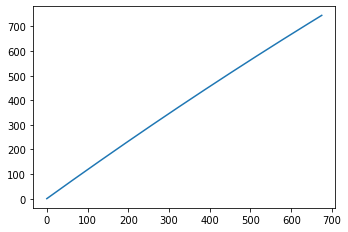

In [33]:
fig = plt.figure("Scipy")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(sol_RK45.y[0],sol_RK45.y[1])

#Ball travels a little under 10000 m before hitting the ground

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [18]:
def rungekutta_4(f,t,x0):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range(0,n-1):
        dt = t[i+1]-t[i]
        k1 = f(t[i],x[i])
        k2 = f(t[i]+dt/2.0,x[i]+dt/2.0*k1)
        k3 = f(t[i]+dt/2.0,x[i]+dt/2.0*k2)
        k4 = f(t[i]+dt,x[i]+dt*k3)
        x[i+1] = x[i] + (dt/6.0)*(k1 +2*k2 +2*k3 + k4)
    return x

In [25]:
t = np.linspace(t0,tf,1001)
sol_rk4_1 = rungekutta_4(proj_vac,t,init_params)
sol_rk4_1

array([[1.00000000e-04, 1.00000000e-04, 1.92836283e+02, 2.29813333e+02],
       [6.75026990e-01, 8.04386579e-01, 1.92836283e+02, 2.29778998e+02],
       [1.34995398e+00, 1.60855299e+00, 1.92836283e+02, 2.29744663e+02],
       ...,
       [6.73577236e+02, 7.42891927e+02, 1.92836283e+02, 1.95547003e+02],
       [6.74252163e+02, 7.43576281e+02, 1.92836283e+02, 1.95512668e+02],
       [6.74927090e+02, 7.44260515e+02, 1.92836283e+02, 1.95478333e+02]])

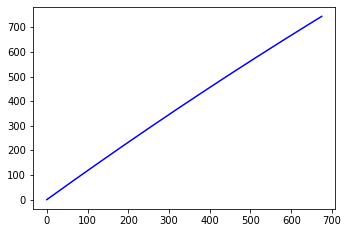

In [26]:
fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(sol_rk4_1[:,0],sol_rk4_1[:,1],'b', label=r'$n = 1001 points$')

#### How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

* $v'_x = \left(\left((\gamma D^2\sqrt{v_x^2+v_y^2}\right)v_x\right)/m$
* $v'_y = \left(-g -\left(\gamma D^2\sqrt{v_x^2+v_y^2}\right)v_y\right)/m$
* $x' = v_x$ 
* $y' = v_y$

Code the equations into a function

In [8]:
g = 9.81
gamma = 0.25
D = 0.15
phi = 7800
m = 4/3 * np.pi * (D/2)**3 * phi
def proj_vac_const_c(t,y):
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = (gamma * D**2 * np.sqrt(y[2]**2+y[3]**2)*y[2])/m
    dvy_dt = (-m*g - (gamma * D**2 * np.sqrt(y[2]**2+y[3]**2)*y[3]))/m
    return np.array((dx_dt,dy_dt,dvx_dt,dvy_dt))
vx0 = 300.0 *np.cos(50.0*np.pi/180.0)
vy0 = 300.0 *np.sin(50.0*np.pi/180.0)
x0 = 0.0001
y0 = 0.0001
t0 = 0
tf = 3.5
init_params = [x0,y0,vx0,vy0]
t_span = np.linspace(t0,tf,10000)

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [9]:
sol_RK45_c = integrate.solve_ivp(proj_vac_const_c,(t0,tf),init_params,method='RK45', t_eval=t_span)

Plot the ball's trajecory and find it's horizontal range

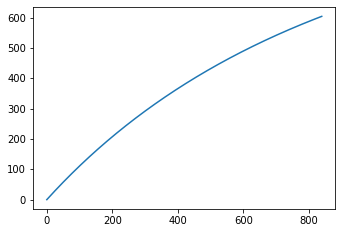

In [10]:
fig = plt.figure("Scipy")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(sol_RK45_c.y[0],sol_RK45_c.y[1])

#running into an issue where the ball doesn't come back down.
#the path up looks normal but once the ball hits the zenith,
#it doesn't come back down, therefore finding horizontal range cannot be done

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

* $v'_x = \left(\gamma D^2 exp\left(-y/\lambda\right)\sqrt{v_x^2+v_y^2}\right)v_x$
* $v'_y = -g -\left(\gamma D^2 exp\left(-y/\lambda\right)\sqrt{v_x^2+v_y^2}\right)v_y$
* $x' = v_x$ 
* $y' = v_y$

Code the equations into a function

In [11]:
g = 9.81
gamma = 0.25
D = 0.15
phi = 7800
lmbda = 10000 
m = 4/3 * np.pi * (D/2)**3 * phi
def proj_vac_atms(t,y):
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = (gamma * D**2 *np.exp(-y[1]/lmbda) * np.sqrt(y[2]**2+y[3]**2)*y[2])/m
    dvy_dt = (-m*g - (gamma * D**2 * np.exp(-y[1]/lmbda) * np.sqrt(y[2]**2+y[3]**2)*y[3]))/m
    return np.array((dx_dt,dy_dt,dvx_dt,dvy_dt))
vx0 = 300.0 *np.cos(50.0*np.pi/180.0)
vy0 = 300.0 *np.sin(50.0*np.pi/180.0)
x0 = 0.0001
y0 = 0.0001
t0 = 0
tf = 3.5
init_params = [x0,y0,vx0,vy0]
t_span = np.linspace(t0,tf,10000)

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [12]:
sol_RK45_atms = integrate.solve_ivp(proj_vac_atms,(t0,tf),init_params,method='RK45', t_eval=t_span)

Plot the ball's trajectory and find it's horizontal range

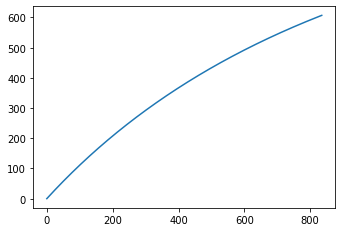

In [16]:
fig = plt.figure("Scipy")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(sol_RK45_atms.y[0],sol_RK45_atms.y[1])

#running into an issue where the ball doesn't come back down.
#the path up looks normal but once the ball hits the zenith,
#it doesn't come back down, therefore finding horizontal range cannot be done

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

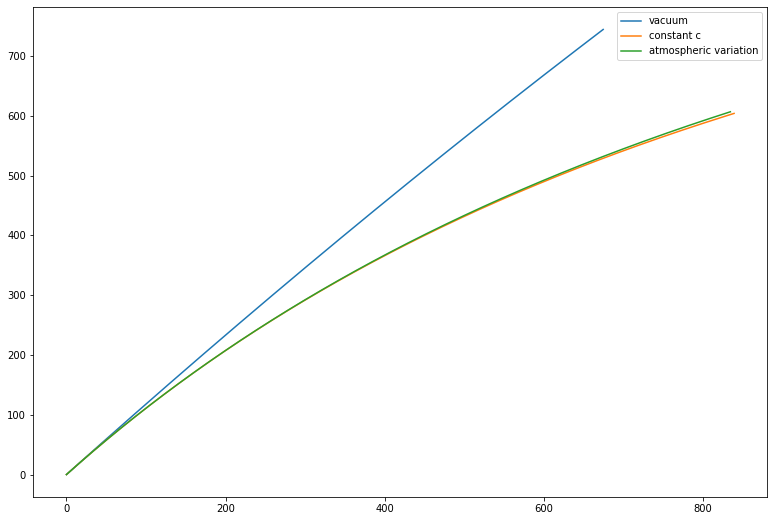

In [14]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1.7,1.7])
ax.plot(sol_RK45.y[0],sol_RK45.y[1],label='vacuum')
ax.plot(sol_RK45_c.y[0],sol_RK45_c.y[1],label='constant c')
ax.plot(sol_RK45_atms.y[0],sol_RK45_atms.y[1],label='atmospheric variation')
ax.legend()

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

Nick: Turning on variation with atmosphere affects it more.